<a href="https://colab.research.google.com/github/aliiabedii/CNNlearn/blob/main/1stSHMcompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

# Define path to your data
data_dir = '/content/drive/MyDrive/dataaaaa'

# Define image dimensions
img_height, img_width = 224, 224

# Create an ImageDataGenerator with optional data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    validation_split= 0.2,  # 20% of the data will be used for validation

)

# Create an ImageDatastore for both training and validation data
training_data =tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=32,
    subset='training',  # Specify 'validation' for the validation subset
    shuffle=True,
    label_mode='categorical'

)
validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    image_size=(img_height, img_width),  # Resize images to (224, 224)
    seed=42,
    batch_size=32,  # Batch size
    subset='validation',  # Specify that this is the validation set
    shuffle=True, # Shuffle the data
    label_mode='categorical'
)

Found 3500 files belonging to 7 classes.
Using 2800 files for training.
Found 3500 files belonging to 7 classes.
Using 700 files for validation.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

# Assuming you have loaded your data into the variables 'Data' and 'Labels'
# Replace these with your actual data and labels

# Example data (replace this with your actual data)
# Data = np.random.rand(120, 224, 224, 3)
# labels = np.random.randint(2, size=(120,))

# Create an ImageDataGenerator with optional data augmentation
# datagen = ImageDataGenerator(
#     horizontal_flip=True,
#     vertical_flip=True,
#     rotation_range=20,
#     validation_split=0.15
# )

# Split data into training and validation sets
# train_data = datagen.flow(data_dir, labels, subset='training')
# val_data = datagen.flow(data_dir, labels, subset='validation')

# Load InceptionV3 model pre-trained on ImageNet
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom model on top of the pre-trained base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    # layers.Dense(100, activation='softmax'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # Binary classification, change to suit your problem
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy','Precision','AUC'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# save the last layer's weights
last_layer_weights = model.layers[-1].get_weights()

# tensorboard
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logsResNet50") #default = "./logs"


# Train the model using the data generators
history = model.fit(training_data, validation_data=validation_data, epochs=300, callbacks=[tensorboard_callback])

# Save the model if needed
# model.save('your_model.h5')


Epoch 1/300
88/88 [==============================] - 28s 236ms/step - loss: 1.0469 - accuracy: 0.7325 - precision: 0.7380 - auc: 0.9419 - val_loss: 0.4937 - val_accuracy: 0.8371 - val_precision: 0.8371 - val_auc: 0.9761
Epoch 2/300
88/88 [==============================] - 20s 229ms/step - loss: 0.9109 - accuracy: 0.7921 - precision: 0.7920 - auc: 0.9547 - val_loss: 0.5629 - val_accuracy: 0.8614 - val_precision: 0.8614 - val_auc: 0.9714
Epoch 3/300
88/88 [==============================] - 19s 210ms/step - loss: 1.0259 - accuracy: 0.7950 - precision: 0.7951 - auc: 0.9472 - val_loss: 0.6182 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_auc: 0.9737
Epoch 4/300
88/88 [==============================] - 20s 227ms/step - loss: 0.9624 - accuracy: 0.8157 - precision: 0.8176 - auc: 0.9533 - val_loss: 0.6429 - val_accuracy: 0.8600 - val_precision: 0.8600 - val_auc: 0.9694
Epoch 5/300
88/88 [==============================] - 19s 209ms/step - loss: 0.9569 - accuracy: 0.8189 - precision: 0.820

['Drift', 'Minor', 'Missing', 'Normal', 'Outlier', 'Square', 'Trend']


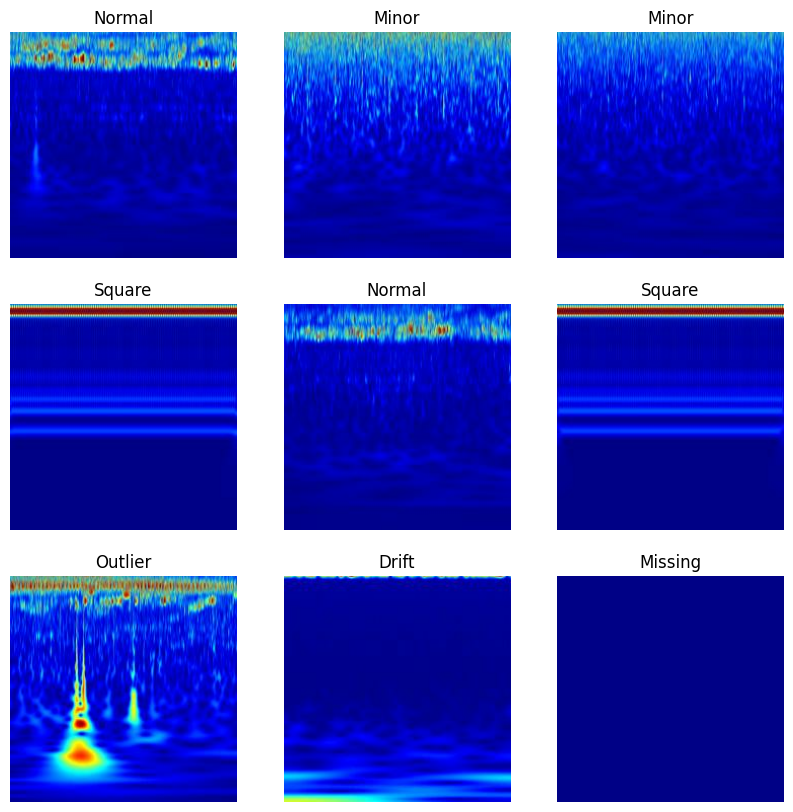

In [7]:
import matplotlib.pyplot as plt

class_names = training_data.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in validation_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")